In [1]:
import pandas as pd
import numpy as np
# Ref for matplotlib: https://www.tutorialspoint.com/matplotlib/index.htm
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [9]:
import pandas as pd

# Define column names for the lenses dataset
cols = ['age', 'prescription', 'astigmatic', 'tear_rate', 'lens_type']

# Import the CSV file for the lenses dataset into a DataFrame
lenses = pd.read_csv(r'C:\Users\Akshath\COURSES\IOT\Lenses_CP3project\lenses\lenses.csv', names=cols, header=0)

# Display the column names and the DataFrame
print(cols)
print(lenses)  # This will display the DataFrame with the lenses data


['age', 'prescription', 'astigmatic', 'tear_rate', 'lens_type']
    age  prescription  astigmatic  tear_rate  lens_type
0     1             1           1          1          3
1     1             1           1          2          2
2     1             1           2          1          3
3     1             1           2          2          1
4     1             2           1          1          3
5     1             2           1          2          2
6     1             2           2          1          3
7     1             2           2          2          1
8     2             1           1          1          3
9     2             1           1          2          2
10    2             1           2          1          3
11    2             1           2          2          1
12    2             2           1          1          3
13    2             2           1          2          2
14    2             2           2          1          3
15    2             2           2       

In [10]:
lenses.head()

,age,prescription,astigmatic,tear_rate,lens_type
0,1,1,1,1,3
1,1,1,1,2,2
2,1,1,2,1,3
3,1,1,2,2,1
4,1,2,1,1,3


In [11]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 10 #8
plot_size [1] = 10 #6
plt.rcParams["figure.figsize"] = plot_size

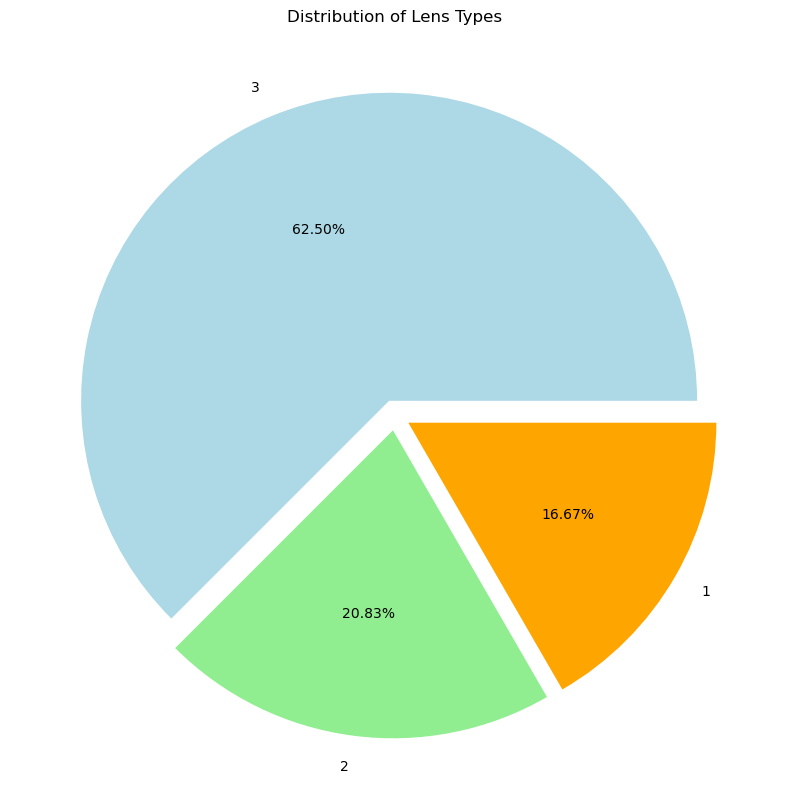

In [14]:
import matplotlib.pyplot as plt

# Plot the distribution of lens types as a pie chart
lenses['lens_type'].value_counts().plot(
    kind='pie', 
    autopct='%0.2f%%', 
    colors=['lightblue', 'lightgreen', 'orange'], 
    explode=(0.05, 0.05, 0.05)
)

# Set title and display the plot
plt.title("Distribution of Lens Types")
plt.ylabel('')  # Hide y-label for better visualization
plt.show()


In [15]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Akshath\COURSES\IOT\Lenses_CP3project\lenses\lenses.csv'
lenses = pd.read_csv(file_path)

# Convert each categorical feature into dummy/indicator variables
age_dummies = pd.get_dummies(lenses.age, prefix='age')
prescription_dummies = pd.get_dummies(lenses.prescription, prefix='prescription')
astigmatic_dummies = pd.get_dummies(lenses.astigmatic, prefix='astigmatic')
tear_rate_dummies = pd.get_dummies(lenses.tear_rate, prefix='tear_rate')

# Convert the target variable into dummy variables
lens_type_dummies = pd.get_dummies(lenses.lens_type, prefix='lens_type')

# Display the transformed dummy variables for verification
print(age_dummies)
print(prescription_dummies)
print(astigmatic_dummies)
print(tear_rate_dummies)
print(lens_type_dummies)


    age_1  age_2  age_3
0       1      0      0
1       1      0      0
2       1      0      0
3       1      0      0
4       1      0      0
5       1      0      0
6       1      0      0
7       1      0      0
8       0      1      0
9       0      1      0
10      0      1      0
11      0      1      0
12      0      1      0
13      0      1      0
14      0      1      0
15      0      1      0
16      0      0      1
17      0      0      1
18      0      0      1
19      0      0      1
20      0      0      1
21      0      0      1
22      0      0      1
23      0      0      1
    prescription_1  prescription_2
0                1               0
1                1               0
2                1               0
3                1               0
4                0               1
5                0               1
6                0               1
7                0               1
8                1               0
9                1               0
10             

In [16]:
# Concatenate all dummy variables into a single DataFrame for features
X = pd.concat([age_dummies, prescription_dummies, astigmatic_dummies, tear_rate_dummies], axis=1)

# Display the shape and content of the feature matrix
print(X.shape)
print(X)


(24, 9)
    age_1  age_2  age_3  prescription_1  prescription_2  astigmatic_1  \
0       1      0      0               1               0             1   
1       1      0      0               1               0             1   
2       1      0      0               1               0             0   
3       1      0      0               1               0             0   
4       1      0      0               0               1             1   
5       1      0      0               0               1             1   
6       1      0      0               0               1             0   
7       1      0      0               0               1             0   
8       0      1      0               1               0             1   
9       0      1      0               1               0             1   
10      0      1      0               1               0             0   
11      0      1      0               1               0             0   
12      0      1      0               0    

In [19]:
# Display the first few rows of other one-hot encoded features
print(prescription_dummies.head())
print(astigmatic_dummies.head())
print(tear_rate_dummies.head())


   prescription_1  prescription_2
0               1               0
1               1               0
2               1               0
3               1               0
4               0               1
   astigmatic_1  astigmatic_2
0             1             0
1             1             0
2             0             1
3             0             1
4             1             0
   tear_rate_1  tear_rate_2
0            1            0
1            0            1
2            1            0
3            0            1
4            1            0


In [20]:
from sklearn.model_selection import train_test_split

# X is the feature matrix created by concatenating dummy variables
# y is the target variable created from the one-hot encoded labels
y = lens_type_dummies

# Display shapes of X and y for verification
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Splitting data into training and testing sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Display the shapes of training and testing sets
print("Shape of X_train and X_test:", X_train.shape, X_test.shape)
print("Shape of y_train and y_test:", y_train.shape, y_test.shape)


Shape of X: (24, 9)
Shape of y: (24, 3)
Shape of X_train and X_test: (19, 9) (5, 9)
Shape of y_train and y_test: (19, 3) (5, 3)


In [21]:
import tensorflow as tf

# Define the number of nodes in each layer of the network
DENSE1_SIZE = 15
DENSE2_SIZE = 10
NUM_OF_EPOCHS = 50
BATCH_SIZE = 8

# Initialize the model
model = tf.keras.Sequential()

# Input layer: Flatten layer to handle input shape of 9 features
input_shape = X.shape[1]
print("Input shape:", input_shape)
model.add(tf.keras.layers.Flatten(input_shape=(input_shape,)))

# First dense layer with ReLU activation
model.add(tf.keras.layers.Dense(DENSE1_SIZE, activation='relu'))

# Second dense layer with ReLU activation
model.add(tf.keras.layers.Dense(DENSE2_SIZE, activation='relu'))

# Output layer: softmax activation for multi-class classification (3 classes)
output_shape = y.shape[1]
print("Output shape:", output_shape)
model.add(tf.keras.layers.Dense(output_shape, activation='softmax'))

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


Input shape: 9
Output shape: 3


In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 15)                150       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_OF_EPOCHS,
    verbose=1,
    validation_split=0.2  # Use 20% of the training data for validation
)


Epoch 1/50
2/2 [==============================] - 1s 182ms/step - loss: 1.3076 - acc: 0.2000 - val_loss: 0.9228 - val_acc: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 26ms/step - loss: 1.2854 - acc: 0.2667 - val_loss: 0.9110 - val_acc: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 29ms/step - loss: 1.2667 - acc: 0.2667 - val_loss: 0.9001 - val_acc: 0.7500
Epoch 4/50
2/2 [==============================] - 0s 29ms/step - loss: 1.2501 - acc: 0.2667 - val_loss: 0.8888 - val_acc: 0.7500
Epoch 5/50
2/2 [==============================] - 0s 26ms/step - loss: 1.2304 - acc: 0.2667 - val_loss: 0.8780 - val_acc: 0.7500
Epoch 6/50
2/2 [==============================] - 0s 29ms/step - loss: 1.2159 - acc: 0.2667 - val_loss: 0.8681 - val_acc: 0.7500
Epoch 7/50
2/2 [==============================] - 0s 26ms/step - loss: 1.1976 - acc: 0.2667 - val_loss: 0.8605 - val_acc: 0.7500
Epoch 8/50
2/2 [==============================] - 0s 28ms/step - loss: 1.1817 - acc: 0.2667 - va

In [24]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=1)

# Print test loss and accuracy
print("Test Score (Loss):", score[0])
print("Test Accuracy:", score[1])


1/1 [==============================] - 0s 26ms/step - loss: 0.6291 - acc: 0.8000
Test Score (Loss): 0.6291371583938599
Test Accuracy: 0.800000011920929


In [25]:
# Save the model in HDF5 format
model.save('LensesClassifyModel.h5')
print("Model saved as 'LensesClassifyModel.h5'")


Model saved as 'LensesClassifyModel.h5'


In [27]:
import numpy as np

# Define a representative dataset generator for TensorFlow Lite quantization
def representative_dataset():
    for i in range(100):
        # Use iloc to get the row at the specified index
        data = X_test.iloc[i % len(X_test)]  # Cycle through X_test if i > len(X_test)
        yield [np.array([data], dtype=np.float32)]  # Convert to float32 and add batch dimension

# Test the function output
for sample in representative_dataset():
    print(sample)
    break  # Print one sample to verify and then exit


[array([[0., 1., 0., 1., 0., 1., 0., 1., 0.]], dtype=float32)]


In [28]:
import tensorflow as tf

# Save the model in the SavedModel format
tf.saved_model.save(model, "saved_lenses_model_dir")

# Load the saved model with TFLiteConverter
converter = tf.lite.TFLiteConverter.from_saved_model("saved_lenses_model_dir")

# Set optimization to reduce the model size if desired (optional)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Set the representative dataset for quantization
converter.representative_dataset = representative_dataset

# Convert the model to TensorFlow Lite format
tflite_model = converter.convert()

# Save the converted model to a .tflite file
with open("LensesClassifyModel.tflite", "wb") as f:
    f.write(tflite_model)

print("Model converted and saved as 'LensesClassifyModel.tflite'")


INFO:tensorflow:Assets written to: saved_lenses_model_dir\assets


Model converted and saved as 'LensesClassifyModel.tflite'


In [29]:
# Save the model in TFLite format
with open("LensesClassifyModel.tflite", "wb") as f:
    f.write(tflite_model)

print("Model saved as 'LensesClassifyModel.tflite'")


Model saved as 'LensesClassifyModel.tflite'


In [30]:
import tensorflow as tf

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="LensesClassifyModel.tflite")
interpreter.allocate_tensors()

print("TFLite model loaded and tensors allocated.")


TFLite model loaded and tensors allocated.


In [31]:
# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Display input and output details
print("Input details:\n", input_details)
print("Output details:\n", output_details)


Input details:
 [{'name': 'serving_default_flatten_input:0', 'index': 0, 'shape': array([1, 9]), 'shape_signature': array([-1,  9]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details:
 [{'name': 'StatefulPartitionedCall:0', 'index': 14, 'shape': array([1, 3]), 'shape_signature': array([-1,  3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [33]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path="LensesClassifyModel.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Display input and output details for verification
print("Input details:\n", input_details)
print("Output details:\n", output_details)

# 1. Test with random input data to check functionality
input_shape = input_details[0]['shape']
random_input_data = np.random.random_sample(input_shape).astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], random_input_data)

# Run inference
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Random input output:", output_data)

# 2. Test with a sample from X_test
# Assuming X_test is a DataFrame, we take a sample and convert it to a numpy array
sample_input_data = np.array([X_test.iloc[0]], dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], sample_input_data)

# Run inference
interpreter.invoke()
sample_output_data = interpreter.get_tensor(output_details[0]['index'])
print("Sample from X_test output:", sample_output_data)

# Verify with the original model
original_model_output = model.predict(sample_input_data)
print("Original model output for X_test sample:", original_model_output)

# 3. Test with additional specific structured input data
# Create structured input matching the one-hot encoding format of the lenses dataset
input1_data = np.array([[1.0, 0.0, 0.0,  # age (e.g., young)
                         1.0, 0.0,        # prescription (e.g., myope)
                         0.0, 1.0,        # astigmatic (e.g., yes)
                         0.0, 1.0]],      # tear_rate (e.g., normal)
                        dtype=np.float32)

interpreter.set_tensor(input_details[0]['index'], input1_data)
interpreter.invoke()
output1_data = interpreter.get_tensor(output_details[0]['index'])
print("Output for structured input1_data:", output1_data)

# Verify with the original model for the same input
original_model_output1 = model.predict(input1_data)
print("Original model output for structured input1_data:", original_model_output1)


Input details:
 [{'name': 'serving_default_flatten_input:0', 'index': 0, 'shape': array([1, 9]), 'shape_signature': array([-1,  9]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details:
 [{'name': 'StatefulPartitionedCall:0', 'index': 14, 'shape': array([1, 3]), 'shape_signature': array([-1,  3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Random input output: [[0.19140625 0.22265625 0.5859375 ]]
Sample from X_test output: [[0.23046875 0.19140625 0.58203125]]
Original model output for X_test sample: [[0.2299582  0.19010498 0.57993686]]
Output for structured input1_data: [[0.3359375 0.3203125 0.34375  ]]
Original model output for structu

In [34]:
import time
import sys
import numpy as np
import tensorflow as tf

# Function to convert hex values into a C array for deployment on ESP32
def hex_to_c_array(hex_data, var_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + var_name.upper() + '_H\n'
    c_str += "#define " + var_name.upper() + '_H\n\n'

    c_str += "/*\n Author: Auto Generated\n"
    c_str += " CAUTION: This is an auto-generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"

    # Time stamp for this model data in the generated file
    localtime = time.asctime(time.localtime(time.time()))
    c_str += " This model data was generated on " + localtime + '\n\n'
    print("This model data was generated on:", localtime)

    # Add information about tool versions used in generating this header file
    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" + str(np.__version__) + \
          "\n TensorFlow:" + str(tf.__version__) + "\n Keras: " + str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.__version__, \
          "\n TensorFlow:", tf.__version__, "\n Keras:", tf.keras.__version__, "\n\n")

    # Training details of the model
    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS = ' + str(NUM_OF_EPOCHS) + '\n'
    c_str += ' BATCH_SIZE    = ' + str(BATCH_SIZE) + '\n*/\n'

    # Generate 'C' constants for the number of nodes in each layer
    c_str += '\nconst int ' + 'DENSE1_SIZE' + ' = ' + str(DENSE1_SIZE) + ';\n'
    c_str +=   'const int ' + 'DENSE2_SIZE' + ' = ' + str(DENSE2_SIZE) + ';\n'      

    # Add array length at the top of the file
    c_str += '\nconst unsigned int ' + var_name + '_len = ' + str(len(hex_data)) + ';\n'

    # Declare C variable
    c_str += 'alignas(8) const unsigned char ' + var_name + '[] = {\n'
    hex_array = []
    for i, val in enumerate(hex_data):
        # Construct string from hex
        hex_str = format(val, '#04x')

        # Add comma for formatting and newlines to stay within 80 characters per line
        if (i + 1) < len(hex_data):
            hex_str += ','
        if (i + 1) % 12 == 0:
            hex_str += '\n'
        hex_array.append(hex_str)

    # Add closing brace
    c_str += '\n' + ''.join(hex_array) + '\n};\n\n'

    # Close out header guard
    c_str += '#endif //' + var_name.upper() + '_H'

    return c_str

# Example usage:
# Assuming `tflite_model_content` contains the raw byte data of the TFLite model
# with open("LensesClassifyModel.tflite", "rb") as f:
#     tflite_model_content = f.read()

# Convert to C array format
# c_code = hex_to_c_array(tflite_model_content, "LensesClassifyModel")
# print(c_code)


In [35]:
# Save the TFLite model as a C source (.h) file for ESP32 deployment
with open("lenses_model_esp32.h", 'w') as file:
    file.write(hex_to_c_array(tflite_model, "lenses_model_esp32"))

print("Model saved as 'lenses_model_esp32.h'")


This model data was generated on: Sat Nov  2 17:42:28 2024
Tools used: Python: 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 05:37:49) [MSC v.1916 64 bit (AMD64)] 
 Numpy: 1.21.5 
 TensorFlow: 2.7.0 
 Keras: 2.7.0 


Model saved as 'lenses_model_esp32.h'


## Verifying OUTPUT from the ino file

In [36]:
import numpy as np

# Define inputs matching the ESP32 inputs
input1 = np.array([[1.0, 0.0, 0.0,  # age (young)
                    1.0, 0.0,        # prescription (myope)
                    1.0, 0.0,        # astigmatic (no)
                    0.0, 1.0]], dtype=np.float32)  # tear_rate (normal)

input2 = np.array([[0.0, 0.0, 1.0,  # age (presbyopic)
                    0.0, 1.0,        # prescription (hypermetrope)
                    0.0, 1.0,        # astigmatic (yes)
                    1.0, 0.0]], dtype=np.float32)  # tear_rate (reduced)

# Assuming the trained Keras model is loaded as `model`
output1 = model.predict(input1)
output2 = model.predict(input2)

# Display the expected output probabilities
print("Expected output for Input1:", output1)
print("Expected output for Input2:", output2)


Expected output for Input1: [[0.3952378  0.3734845  0.23127764]]
Expected output for Input2: [[0.08433089 0.08113607 0.8345331 ]]
